#### Enzzo Comassetto dos Santos
#### Frequência do ruído: 8kHz
#### Ordem do filtro passa baixas: N= 150

In [3]:
from scipy.io import wavfile
from IPython.display import (Audio, display, clear_output)
import scipy.io.wavfile as wav
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
%matplotlib inline

In [4]:
fs, som = wavfile.read('fala-tom-alta-freq.wav')
print(fs)
display(Audio(som, rate=fs))

C:\Users\csenz\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


48000


Text(0.5, 1.0, 'FFT do audio com ruído')

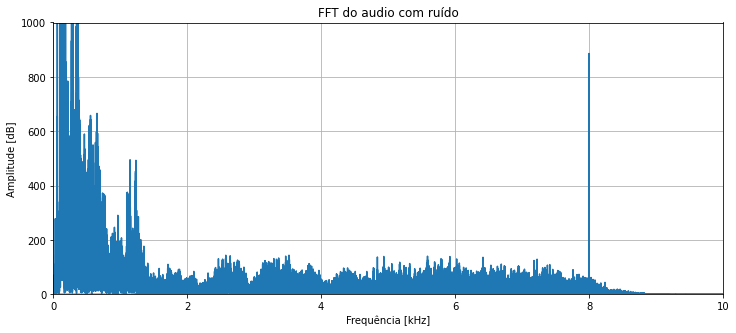

In [21]:
fourier = np.fft.fft(som)
n = fourier.size
freqOri = np.fft.fftfreq(n, 1/fs)
plt.figure(figsize=(12, 5))
plt.xlim(0,10)
plt.ylim(0,1000)
plt.grid()
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequência [kHz]')
plt.plot(freqOri/1000,abs(fourier)*2/fs)
plt.title('FFT do audio com ruído')

Frequência do ruído = 8kHz


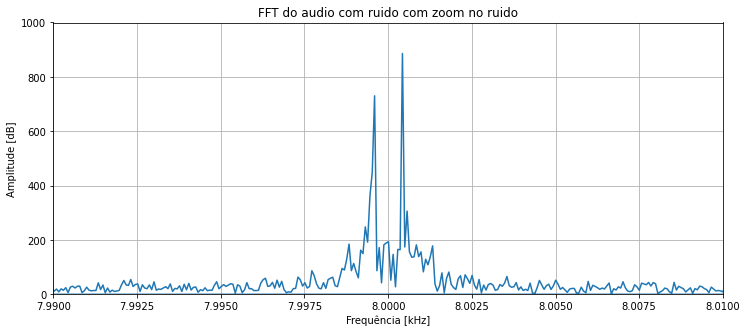

In [22]:
fourier = np.fft.fft(som)
n = fourier.size
freqOri = np.fft.fftfreq(n, 1/fs)
plt.figure(figsize=(12, 5))
plt.xlim(7.99,8.01)
plt.ylim(0,1000)
plt.grid()
plt.title('FFT do audio com ruido com zoom no ruido')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequência [kHz]')
plt.plot(freqOri/1000,abs(fourier)*2/fs)
print('Frequência do ruído = 8kHz')

In [7]:
coeficientes_filtro = pd.read_csv('FIR_PB.csv',sep=',',header=None)
b=coeficientes_filtro.values.ravel()
arr = b.reshape(b.size,1)
f = open("Filtro_Fir_48k_ajustado.txt", "w")
for row in arr:
    np.savetxt(f, row)
f.close()

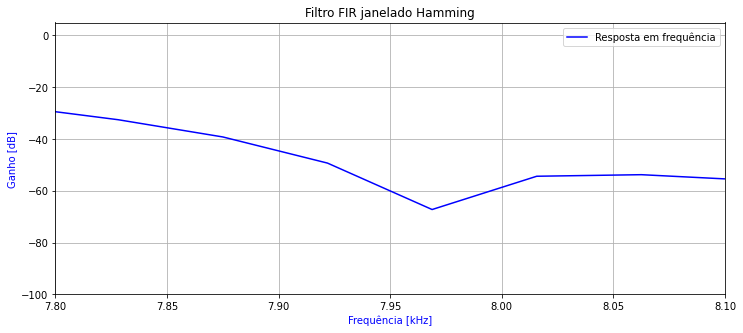

In [23]:
w, h = signal.freqz(b,fs=fs)
plt.figure(figsize=(12,5))
plt.title('Filtro FIR janelado Hamming')
plt.plot(w/1000, 20 * np.log10(abs(h)), 'b',label='Resposta em frequência')
plt.ylabel('Ganho [dB]', color='b')
plt.xlabel('Frequência [kHz]', color='b')
plt.legend()
plt.ylim(-100,5)
plt.xlim(7.8,8.1)
plt.grid()
plt.show()

In [9]:
sinal_filtrado = signal.lfilter(b,1,som)
sinal_filtrado = sinal_filtrado/max(abs(sinal_filtrado))
wav.write('audio-sem-ruido-FIR.wav',fs,sinal_filtrado)
display(Audio(sinal_filtrado, rate=fs, autoplay=False))

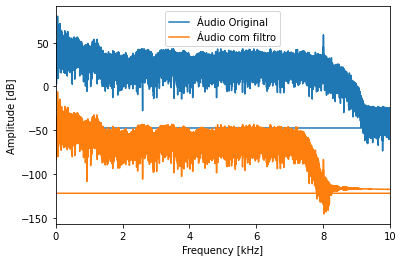

In [10]:
plt.plot(freqOri/1000,20 * np.log10(abs(fourier)*2/fs), label = "Áudio Original")
filtrado_fourier = np.fft.fft(sinal_filtrado)
n_filtrado_fourier = filtrado_fourier.size
freq_fir = np.fft.fftfreq(n_filtrado_fourier, 1/fs)
plt.plot(freq_fir/1000,20 * np.log10(abs(filtrado_fourier)*2/fs), label = "Áudio com filtro")
plt.xlim(0,10)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [kHz]')
plt.legend()